In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 📚 assignments

In [2]:
hotels = pd.read_excel('./data/HotelCustomersDataset.xlsx')
hotels.head(2)

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## assignment 1
subplots

/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_2145/251493269.py:26: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
/var/folders/6m/0djhjcm16l566_6h_pcqsfmh0000gn/T/ipykernel_2145/251493269.py:27: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)


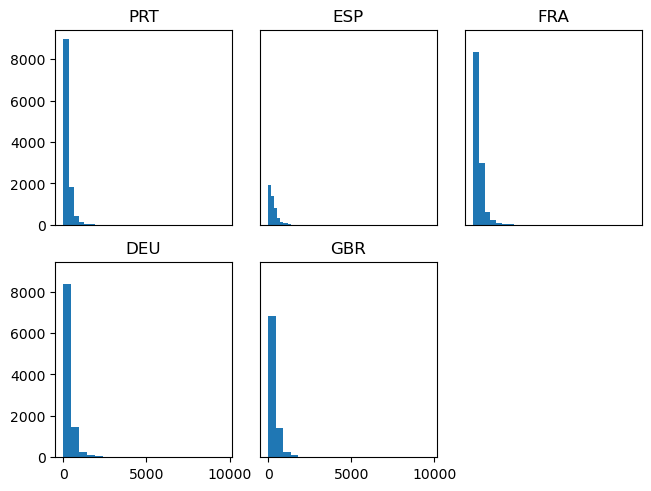

In [3]:
# solution 1
country_list = ['PRT', 'ESP', 'FRA', 'DEU', 'GBR']
ax_list = []
nrows, ncols = (2, 3)

fig = plt.figure(constrained_layout=True)

for i, country in enumerate(country_list):
    ax = fig.add_subplot(nrows, ncols, i+1)
    ax.hist(
        hotels
        .query(f"Nationality=='{country}' & RoomNights < 15")
        .loc[:, 'LodgingRevenue'],
        bins=20
    )
    
    ax.set_title(f"{country}")
    ax_list.append(ax)
    
    if i % ncols != 0:
        ax.set_yticks([])
        
    if (i / ncols) < nrows - 1:
        ax.set_xticks([])
        
ax_list[0].get_shared_x_axes().join(ax_list[0], *ax_list)
ax_list[0].get_shared_y_axes().join(ax_list[0], *ax_list)

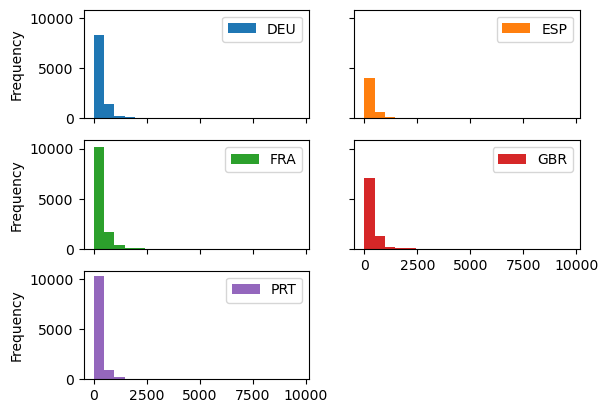

In [4]:
# solution 2
hotels_pivot = (
    hotels
    .query('Nationality in @country_list and RoomNights < 15')
    .pivot_table(
        index='ID',
        columns='Nationality',
        values='LodgingRevenue'
    )
)

hotels_pivot.plot.hist(
    subplots=True,
    bins=20,
    layout=(3, 2),
    sharex=True,
    sharey=True
);

## assignment 2
gridspec

In [5]:
hotels = (
    hotels
    .assign(
        date=pd.to_datetime('2018-12-31') - pd.to_timedelta(hotels['DaysSinceCreation'], unit='D'),
        total_revenue=hotels['LodgingRevenue'] + hotels['OtherRevenue']
    )
)

hotel_monthly_revenue = (
    hotels
    .groupby('date')
    .agg({'LodgingRevenue': 'sum', 'OtherRevenue': 'sum', 'total_revenue': 'sum'})
    .resample('M')
    .sum()
)

hotel_monthly_revenue.head()

,LodgingRevenue,OtherRevenue,total_revenue
date,,,
2016-01-31,124531.34,52190.50,176721.84
2016-02-29,131689.12,51203.13,182892.25
2016-03-31,443476.86,127336.11,570812.97
2016-04-30,500966.80,145228.87,646195.67
2016-05-31,634200.17,143359.35,777559.52


In [6]:
# Bar Chart Data
rev_by_country = (
    hotels
    .groupby('Nationality')
    .agg({'total_revenue': 'sum'})
    .sort_values('total_revenue', ascending=False)
    .iloc[:5]
)
rev_by_country

,total_revenue
Nationality,
FRA,4842481.89
DEU,3838924.08
PRT,3380643.30
GBR,3284336.38
ESP,1795750.15


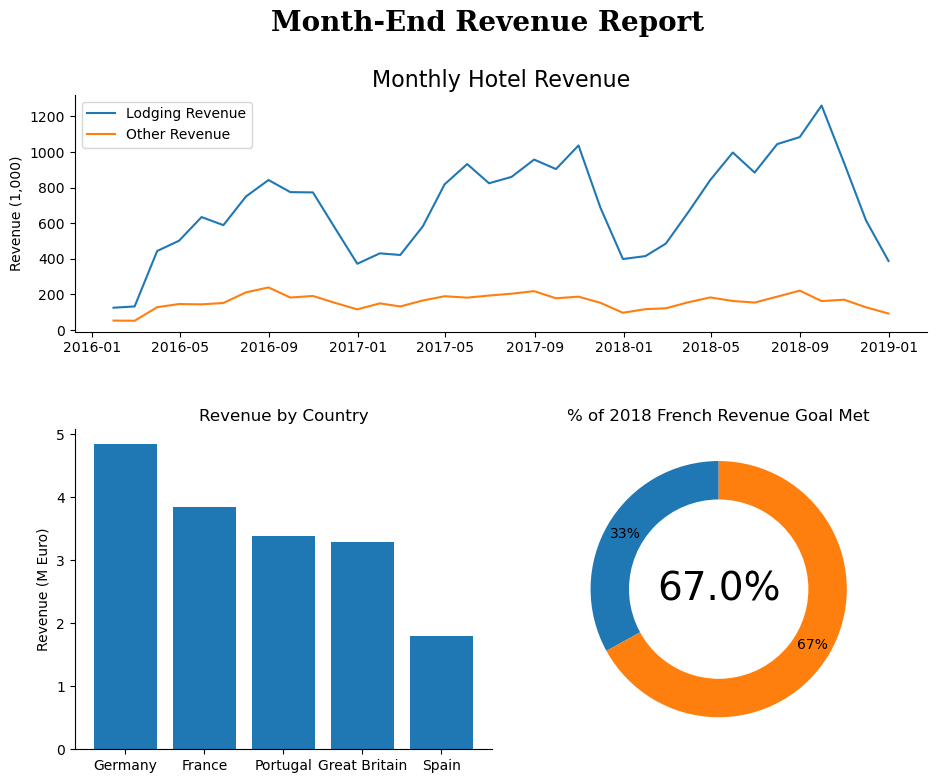

In [7]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(11, 8.5))
fig.suptitle('Month-End Revenue Report', fontsize=20, fontweight='bold', fontfamily='serif')

gs = gridspec.GridSpec(nrows=8, ncols=8)

# Line Chart
ax1 = fig.add_subplot(gs[0:3, :])
ax1.plot(
    hotel_monthly_revenue.index,
    hotel_monthly_revenue['LodgingRevenue'] / 1000,
    label='Lodging Revenue'
)
ax1.plot(
    hotel_monthly_revenue.index,
    hotel_monthly_revenue['OtherRevenue'] / 1000,
    label='Other Revenue'
)
ax1.set_title('Monthly Hotel Revenue', fontsize=16)
ax1.set_ylabel('Revenue (1,000)')

ax1.legend(loc='upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar Chart
ax2 = fig.add_subplot(gs[4:, :4])

ax2.bar(
    rev_by_country.index,
    rev_by_country['total_revenue'] / 1000000
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany', 'France', 'Portugal', 'Great Britain', 'Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart
ax3 = fig.add_subplot(gs[4:, 4:])

pie_list = [.33, .67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=['', ''],
    autopct='%.0f%%',
    pctdistance=.85
)

hole = plt.Circle((0, 0), .7, facecolor='white')
fig = plt.gcf()

fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f"{pie_list[1] * 100}%",
    ha='center',
    va='center',
    fontsize=28
)

ax3.set_title('% of 2018 French Revenue Goal Met', fontsize=12);

## assignment 3
colors

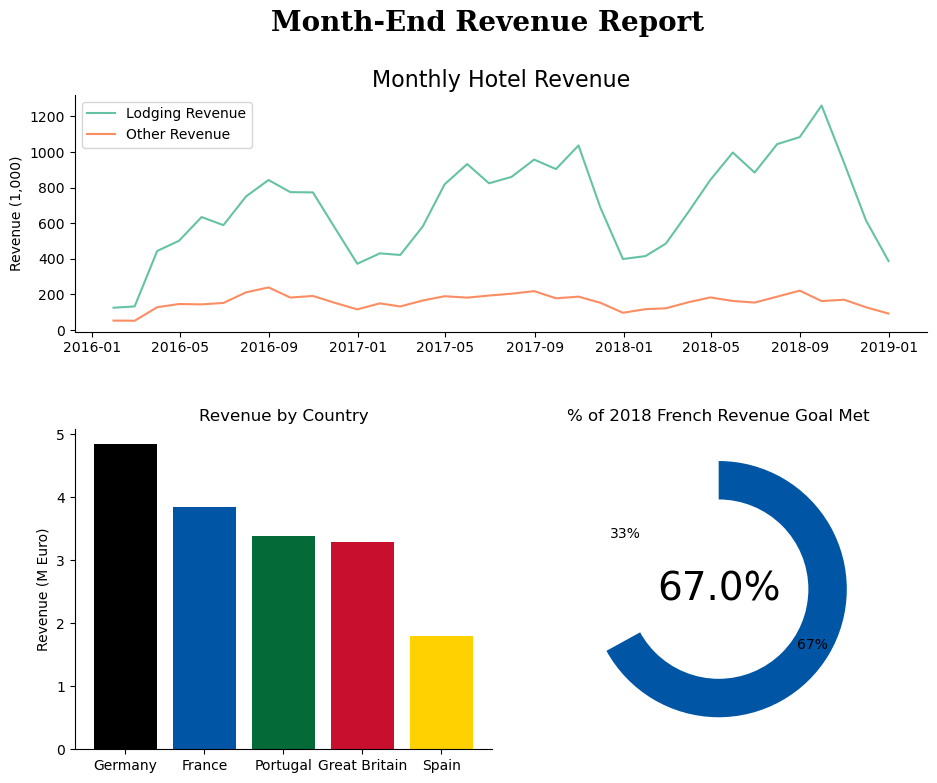

In [8]:
import matplotlib.gridspec as gridspec

plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)

fig = plt.figure(figsize=(11, 8.5))
fig.suptitle('Month-End Revenue Report', fontsize=20, fontweight='bold', fontfamily='serif')

gs = gridspec.GridSpec(nrows=8, ncols=8)

# Line Chart
ax1 = fig.add_subplot(gs[0:3, :])
ax1.plot(
    hotel_monthly_revenue.index,
    hotel_monthly_revenue['LodgingRevenue'] / 1000,
    label='Lodging Revenue'
)
ax1.plot(
    hotel_monthly_revenue.index,
    hotel_monthly_revenue['OtherRevenue'] / 1000,
    label='Other Revenue'
)
ax1.set_title('Monthly Hotel Revenue', fontsize=16)
ax1.set_ylabel('Revenue (1,000)')

ax1.legend(loc='upper left')

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Bar Chart
ax2 = fig.add_subplot(gs[4:, :4])

# ✅
colors = ['black', '#0055A4', '#046A38', '#C8102E', '#FFD100']

ax2.bar(
    rev_by_country.index,
    rev_by_country['total_revenue'] / 1000000,
    color=colors
)

ax2.set_title('Revenue by Country')
ax2.set_xticks(range(len(rev_by_country.index)))
ax2.set_xticklabels(['Germany', 'France', 'Portugal', 'Great Britain', 'Spain'])
ax2.set_ylabel('Revenue (M Euro)')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Pie Chart
ax3 = fig.add_subplot(gs[4:, 4:])

pie_list = [.33, .67]

ax3.pie(
    pie_list,
    startangle=90,
    labels=['', ''],
    autopct='%.0f%%',
    pctdistance=.85,
    colors=['white', '#0055A4']
)

hole = plt.Circle((0, 0), .7, facecolor='white')
fig = plt.gcf()

fig.gca().add_artist(hole)
plt.text(
    0, 0,
    f"{pie_list[1] * 100}%",
    ha='center',
    va='center',
    fontsize=28
)

ax3.set_title('% of 2018 French Revenue Goal Met', fontsize=12);